# LEGO Dataset Project: Loading and Analyzing Data in MySQL

## Carga de Datos de Archivos CSV a una Base de Datos MySQL: LEGO Dataset

El primer objetivo de este proyecto es cargar datos de varios archivos CSV relacionados con sets de LEGO en una base de datos MySQL. Utilizaremos pandas para leer los archivos, procesar los datos y enviarlos a la base de datos. Los archivos contienen información sobre colores, piezas, temas, inventarios, etc.


## Esquema de la Base de Datos LEGO

La base de datos se compone de varias tablas que contienen información sobre los sets de LEGO, sus partes, colores, temas, y más.


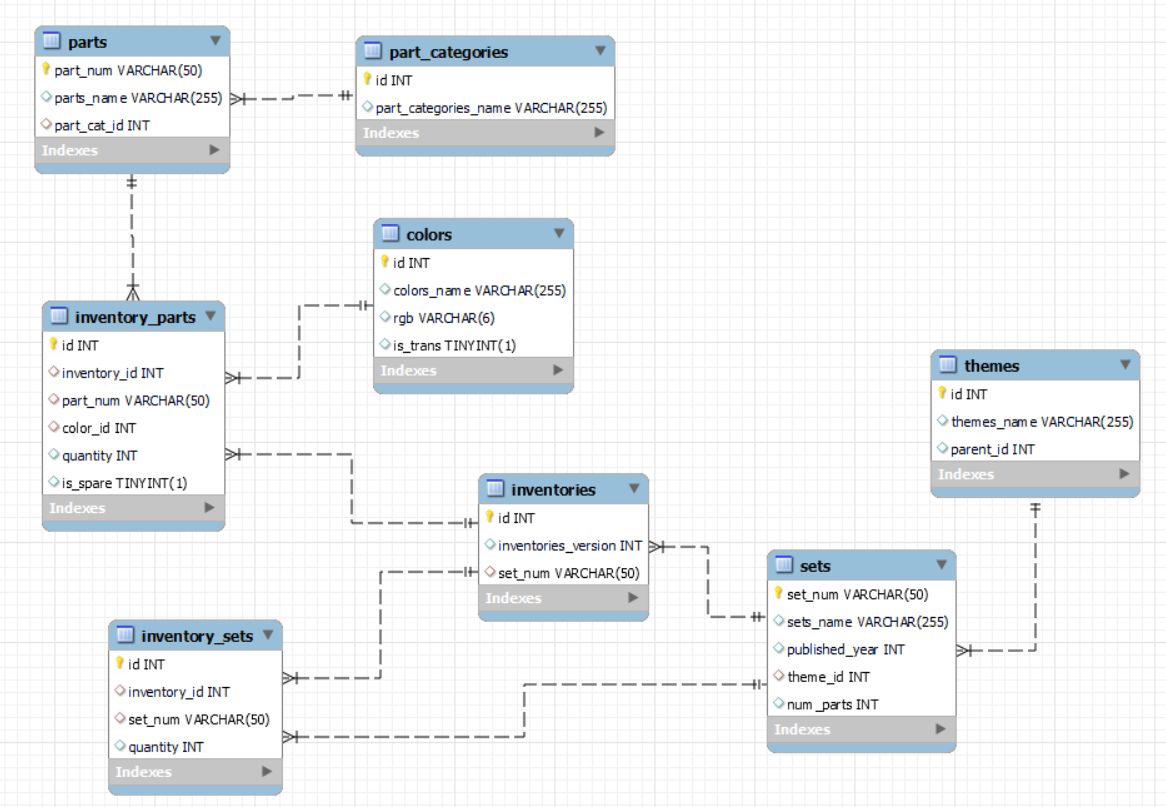

### Librerías Necesarias

Estas librerías son necesarias para la manipulación de datos y la conexión a MySQL. pandas se usa para leer y procesar los datos CSV, mientras que SQLAlchemy permite conectarse y enviar datos a MySQL.

In [1]:
import pandas as pd
from sqlalchemy import create_engine, text
import pymysql

### Carga y Procesamiento de Datos

**Carga del CSV colors.csv**

El primer paso es cargar el archivo colors.csv, que contiene información sobre los colores de las piezas de LEGO.

In [2]:
df_colors = pd.read_csv('csvs/colors.csv')

df_colors

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


La columna is_trans indica si el color es transparente o no, representado con 't' (true) y 'f' (false). Modificamos estos valores para que sean numéricos (0 para falso y 1 para verdadero).

Renombramos la columna name a colors_name para evitar conflictos con otros datasets y tener una nomenclatura más clara.

In [3]:
df_colors['is_trans'] = df_colors['is_trans'].map({'f': 0, 't': 1})

df_colors.rename(columns={'name': 'colors_name'}, inplace=True)

df_colors


,id,colors_name,rgb,is_trans
0,-1,Unknown,0033B2,0
1,0,Black,05131D,0
2,1,Blue,0055BF,0
3,2,Green,237841,0
4,3,Dark Turquoise,008F9B,0
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,1
131,1005,Trans Fire Yellow,FBE890,1
132,1006,Trans Light Royal Blue,B4D4F7,1
133,1007,Reddish Lilac,8E5597,0


**Carga del CSV inventory_parts.csv**

El archivo inventory_parts.csv contiene información sobre las partes en los inventarios. El campo is_spare indica si una parte es de repuesto, representado también con 't' y 'f'.

In [4]:
df_inventory_parts = pd.read_csv('csvs/inventory_parts.csv')

df_inventory_parts

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f
...,...,...,...,...,...
580246,18708,99206,0,3,f
580247,18708,99207,71,4,f
580248,18708,99780,15,4,f
580249,18708,99780,0,9,f


In [5]:
df_inventory_parts['is_spare'] = df_inventory_parts['is_spare'].map({'f': 0, 't': 1})
df_inventory_parts

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,0
1,1,48395,7,1,0
2,1,mcsport6,25,1,0
3,1,paddle,0,1,0
4,3,11816pr0005,78,1,0
...,...,...,...,...,...
580246,18708,99206,0,3,0
580247,18708,99207,71,4,0
580248,18708,99780,15,4,0
580249,18708,99780,0,9,0


**Carga del CSV inventories.csv**

El archivo inventories.csv contiene información sobre los inventarios de sets de LEGO. Renombramos la columna version a inventories_version para evitar conflictos.

In [7]:
df_inventories = pd.read_csv('csvs/inventories.csv')

df_inventories.rename(columns={'version': 'inventories_version'}, inplace=True)

df_inventories

,id,inventories_version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1
...,...,...,...
11676,18593,1,31066-1
11677,18645,1,71018-7
11678,18701,1,71018-17
11679,18704,1,60159-1


**Carga del CSV inventory_sets.csv**

Este archivo contiene la relación entre inventarios y sets. Cargamos los datos sin modificaciones.

In [8]:
df_inventory_sets = pd.read_csv('csvs/inventory_sets.csv')

df_inventory_sets 

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1
...,...,...,...
2841,18701,71018-5,1
2842,18701,71018-6,1
2843,18701,71018-7,1
2844,18701,71018-8,1


**Carga del CSV part_categories.csv**

El archivo part_categories.csv contiene las categorías de piezas de LEGO. Renombramos name a part_categories_name para mayor claridad.

In [11]:
df_part_categories = pd.read_csv('csvs/part_categories.csv')

df_part_categories.rename(columns={'name': 'part_categories_name'}, inplace=True)

df_part_categories

,id,part_categories_name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special
5,6,Bricks Wedged
6,7,Containers
7,8,Technic Bricks
8,9,Plates Special
9,10,Tiles Printed


**Carga del CSV parts.csv**

Este archivo contiene información sobre las piezas individuales de LEGO. Al igual que antes, renombramos la columna name a parts_name.

In [12]:
df_parts = pd.read_csv('csvs/parts.csv')

df_parts.rename(columns={'name': 'parts_name'}, inplace=True)

df_parts

,part_num,parts_name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1
...,...,...,...
25988,zbb013,Znap Connector 3 x 3 - 4 way B (Beam),43
25989,zbb014,Znap Connector 1 x 3 - 2 way A,43
25990,zbb015,"Znap Beam 3, 1 Hole",43
25991,zbb018,Znap Connector 3 x 3 - 4 way C (Closed),43


**Carga del CSV sets.csv**

El archivo sets.csv contiene información sobre los sets de LEGO, incluyendo el nombre y el año de publicación. Renombramos name a sets_name y year a published_year.

In [14]:
df_sets = pd.read_csv('csvs/sets.csv')

df_sets.rename(columns={'name': 'sets_name', 'year': 'published_year'}, inplace=True)

df_sets

,set_num,sets_name,published_year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15
11669,WHITEHOUSE-1,Micro White House,2015,598,59
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
11671,WishingWell-1,Wishing Well [Toys R Us Promo],2013,494,28


**Carga del CSV themes.csv**

Este archivo contiene la lista de temas de LEGO, con el nombre del tema. Renombramos la columna name a themes_name.

In [16]:
df_themes = pd.read_csv('csvs/themes.csv')

df_themes.rename(columns={'name': 'themes_name'}, inplace=True)

df_themes

,id,themes_name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
609,610,Brickheadz,NaN
610,611,Series 17 Minifigures,535.0
611,612,Star Wars Episode 8,158.0
612,613,Freemakers,158.0


### Configuración de la Conexión a MySQL
A continuación, configuramos la conexión a la base de datos MySQL usando SQLAlchemy.

In [17]:
# Parámetros de conexión
bd = "lego_inventory"
password = "1234"
connection_string = 'mysql+pymysql://root:' + password + '@localhost/' + bd
engine = create_engine(connection_string)
 

### Envío de Datos a MySQL

Ahora, enviamos los DataFrames cargados y procesados a la base de datos MySQL.

In [18]:
# Enviar el DataFrame 'colors' a MySQL
table_name = 'colors'
df_colors.to_sql(table_name, con=engine, if_exists='append', index=False)

135

In [19]:
# Enviar el DataFrame 'part_categories' a MySQL
table_name = 'part_categories'
df_part_categories.to_sql(table_name, con=engine, if_exists='append', index=False)

57

In [20]:
# Enviar el DataFrame 'parts' a MySQL
table_name = 'parts'
df_parts.to_sql(table_name, con=engine, if_exists='append', index=False)

25993

In [21]:
# Enviar el DataFrame 'themes' a MySQL
table_name = 'themes'
df_themes.to_sql(table_name, con=engine, if_exists='append', index=False)

614

In [22]:
# Enviar el DataFrame 'sets' a MySQL
table_name = 'sets'
df_sets.to_sql(table_name, con=engine, if_exists='append', index=False)

11673

In [23]:
# Enviar el DataFrame 'inventories' a MySQL
table_name = 'inventories'
df_inventories.to_sql(table_name, con=engine, if_exists='append', index=False)

11681

In [24]:
# Enviar el DataFrame 'inventory_sets' a MySQL
table_name = 'inventory_sets'
df_inventory_sets.to_sql(table_name, con=engine, if_exists='append', index=False)

2846

**Limpieza de Datos en inventory_parts**

Antes de cargar los datos de inventory_parts a la base de datos, es necesario asegurarse de que todas las part_num existan en la tabla parts. Eliminamos las filas de inventory_parts que contienen part_num no presentes en parts.

In [31]:
# Eliminar filas con part_num no existentes en parts    
df_inventory_parts = df_inventory_parts[df_inventory_parts['part_num'].isin(df_parts['part_num'])]


**Envío de inventory_parts a MySQL**

Finalmente, enviamos el DataFrame filtrado de inventory_parts a la base de datos.

In [33]:
# Enviar DataFrame a MySQL
table_name = 'inventory_parts'
df_inventory_parts.to_sql(table_name, con=engine, if_exists='append', index=False)

580069

Este notebook demuestra el proceso de carga de datos desde archivos CSV hacia una base de datos MySQL. Se realizaron transformaciones y limpieza de los datos antes de ser enviados a la base de datos, asegurando que los datos sean consistentes y estén correctamente formateados. Esto establece la base para realizar análisis avanzados en SQL, que es el siguiente paso en el proyecto.